In [1]:
import pandas as pd
import numpy as np
from pycaret.regression  import *
from fast_ml import eda

In [2]:
df = pd.read_csv('data/hipparcos.csv')

In [3]:
df = df[df['Plx'].notna()] # Eliminamos los valores faltantes
df = df[df['Plx'] > 1] # Filtramos todos los valores de paralaje menores a 0.001 arcosegundos 
df['d'] = (1 / df['Plx']) * 1000# Corregimos la columna de las distancias

In [4]:
eda.df_info(df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Catalog,object,Categorical,1,[H],0,0.0
HIP,int64,Numerical,107288,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
Proxy,object,Categorical,2,"[nan, H, T]",97197,90.594475
RAhms,object,Categorical,106615,"[00 00 00.22, 00 00 00.91, 00 00 01.20, 00 00 ...",0,0.0
DEdms,object,Categorical,106249,"[+01 05 20.4, -19 29 55.8, +38 51 33.4, -51 53...",0,0.0
...,...,...,...,...,...,...
CPD,object,Categorical,36769,"[nan, P-52 12237, P-41 9991, P-51 12065, P-36...",70519,65.728693
(V-I)red,float64,Numerical,544,"[0.66, 1.04, 0.0, 0.43, 0.95, 1.55, 0.79, 4.82...",0,0.0
SpType,object,Categorical,3540,"[F5, K3V, B9, F0V, G8III, M0V:, G0, M6e-M8.5e ...",2414,2.250019
r_SpType,object,Categorical,8,"[S, 4, 2, G, 3, X, 1, nan, K]",2414,2.250019


In [5]:
df['SpType'].value_counts()

K0             7776
G5             5688
A0             4510
F8             4225
G0             4086
               ... 
B7IIIp...         1
M4:               1
M5e-M7IIIe        1
G3/G5II/III       1
A4:IV/Vn...       1
Name: SpType, Length: 3540, dtype: int64

In [6]:
#Removemos los valores nan de la columna Transported(es la columna objetivo, pycaret necesita los datos limpios, sirva esto como un ejemplo para pycaret no de tratamiendo)
df = df.dropna(subset=['SpType']) 

In [7]:
#aplicamos un encoder a nuestro dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df:
    df[column] = le.fit_transform(df[column])


In [8]:
#Creamos nuestro setup con la columna objetivo
setup = setup(df, target='SpType', session_id=357, preprocess=False, train_size=0.8)

In [9]:
#Creamos una evaluación rápida de modelos
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:31:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [10]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=357)


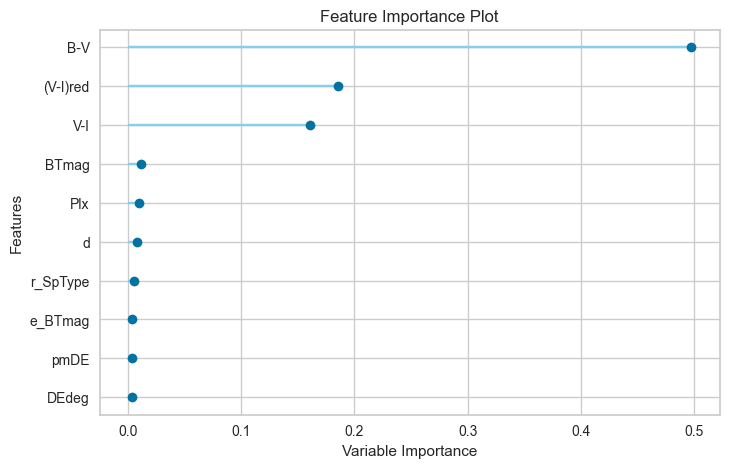

In [11]:
# plot feature importance
plot_model(best, plot = 'feature' )

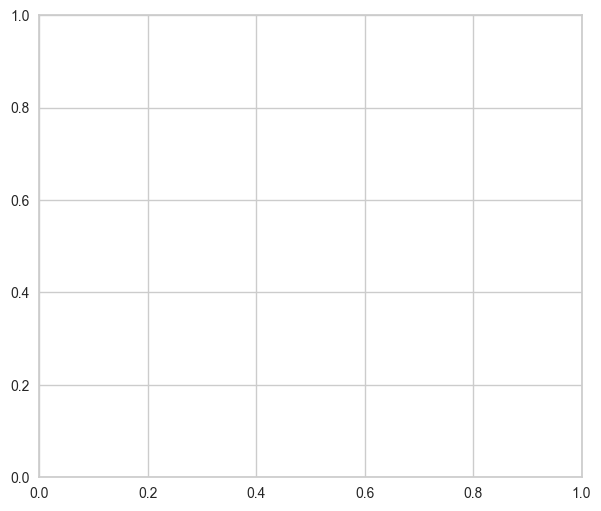

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
evaluate_model(best) #otra manera 

In [14]:
# predicción modelo
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,175.1410,87657.4924,296.0701,0.8956,0.9117,3.5009


In [15]:
# vemos las predicciones
holdout_pred.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Notes,HD,BD,CoD,CPD,(V-I)red,r_SpType,d,SpType,prediction_label
33176,0,29611,0,29417,85315,675,3,1,29612,18691,...,7,24656,66268,18495,17643,75,1,4631,602,1284.79
87257,0,77486,2,76991,9387,429,3,1,77490,63333,...,7,64639,9649,24874,36510,161,7,4232,2743,2835.05
34854,0,31057,2,30847,62670,682,3,0,31058,41593,...,7,25808,61534,24874,36510,41,3,4749,1182,1027.41
92785,0,82331,2,81809,6582,820,3,0,82336,60494,...,7,91239,66268,24874,36510,286,5,245,3195,3167.67
109928,0,97500,2,96898,40740,807,3,0,97504,95018,...,7,91239,39912,24874,36510,69,7,4467,844,998.04


In [16]:
# Hago una copia de los datos y elimino la variable objetivo
new_data = df.copy()
new_data.drop('SpType', axis=1, inplace=True)
new_data.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,r_SpType,d
0,0,0,2,0,851,720,3,1,0,54702,...,0,2,7,87846,760,24874,36510,106,6,4519
1,0,1,2,1,64661,737,3,0,1,39581,...,1,2,7,87843,64803,24874,36510,144,3,2684
2,0,2,2,2,30177,471,3,0,2,84347,...,0,2,7,87845,29764,24874,36510,40,6,4592
3,0,3,2,3,90105,616,3,1,3,13843,...,0,2,7,87848,66268,24874,23778,83,1,4098
4,0,4,2,4,80951,665,3,1,4,23116,...,1,2,7,87847,66268,15839,15028,135,1,4586


In [17]:
# Pruebo mi modelo de predicción con el nuevo dataset guardado como new_data #estan vacios ya que el resultado se guardo en "predictions"
predictions = predict_model(best, data = new_data)
predictions.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,r_SpType,d,prediction_label
0,0,0,2,0,851,720,3,1,0,54702,...,2,7,87846,760,24874,36510,106,6,4519,1641.00
1,0,1,2,1,64661,737,3,0,1,39581,...,2,7,87843,64803,24874,36510,144,3,2684,2946.00
2,0,2,2,2,30177,471,3,0,2,84347,...,2,7,87845,29764,24874,36510,40,6,4592,670.28
3,0,3,2,3,90105,616,3,1,3,13843,...,2,7,87848,66268,24874,23778,83,1,4098,1446.00
4,0,4,2,4,80951,665,3,1,4,23116,...,2,7,87847,66268,15839,15028,135,1,4586,2441.00


In [18]:
#finalizado el modelo 
finalize_model(best)

Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=357))])

In [19]:
# #guardo el modelo
save_model(best, 'hyp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=357))]),
 'hyp.pkl')

In [20]:
#cargo el modelo
loaded_best_pipeline = load_model('hyp')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/l7/2cl9nrjs74bc3y72c8n3j2k80000gp/T/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=357))])